<a href="https://colab.research.google.com/github/kastdash/AI-Grief-Companion/blob/main/Comparative_Outcome_Simulation_for_Hypothetical_Surgical_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Simulate and compare different hypothetical surgical approaches for a specific patient, predicting functional recovery and aesthetic outcomes over time using a simplified model, visualizing the results, and summarizing the findings to provide insights for surgical strategy comparison.

## Define Surgical Approaches and Outcome Metrics

### Subtask:
Establish a set of hypothetical surgical approaches and define the quantitative metrics (e.g., functional recovery scores, aesthetic scores) that will be used to compare their outcomes at various post-operative stages (3 months, 1 year, 5 years). This step involves structuring the input and output data for the simulation.


### Defined Surgical Approaches and Outcome Metrics

To establish the input and output data structure for our simulation, we define the following:

1.  **Hypothetical Surgical Approaches**:
    *   `Approach A`: A standard surgical technique.
    *   `Approach B`: A minimally invasive technique.
    *   `Approach C`: A novel, experimental technique.

2.  **Post-operative Time Points for Outcome Evaluation**:
    *   `3 Months`
    *   `1 Year`
    *   `5 Years`

3.  **Quantitative Outcome Metrics**:
    *   `Functional Recovery Score`: A numerical value ranging from 0 to 100, where a higher score indicates better functional recovery.
    *   `Aesthetic Score`: A numerical value ranging from 0 to 100, where a higher score indicates a more favorable aesthetic outcome.

These definitions will guide the data simulation and predictive modeling in the subsequent stages.

## Simulate Patient and Outcome Data

### Subtask:
Generate mock historical data that includes patient characteristics, the surgical approach applied, and corresponding simulated post-operative outcomes (functional recovery scores and aesthetic scores) at 3 months, 1 year, and 5 years. This data will serve as the basis for our simplified predictive model.


**Reasoning**:
The first step is to import the necessary libraries, `pandas` for data manipulation and `numpy` for numerical operations, as instructed. Then I will proceed with generating the mock data.



In [ ]:
import pandas as pd
import numpy as np

# 2. Define the number of synthetic patients
n_patients = 1000

# 3. Generate mock patient characteristics
np.random.seed(42) # for reproducibility

age = np.random.randint(30, 71, n_patients)
bmi = np.random.uniform(18.0, 35.0, n_patients)
general_health_score = np.random.randint(1, 11, n_patients)

# 4. Randomly assign Surgical_Approach
surgical_approaches = ['Approach A', 'Approach B', 'Approach C']
surgical_approach = np.random.choice(surgical_approaches, n_patients)

# Initialize lists to store outcome data
functional_3m = []
aesthetic_3m = []
functional_1y = []
aesthetic_1y = []
functional_5y = []
aesthetic_5y = []

# 5. Simulate outcomes with variability based on surgical approach
for i in range(n_patients):
    approach = surgical_approach[i]

    # Base scores and noise for functional and aesthetic
    # These are illustrative, actual variability can be more complex
    base_functional_3m = 70 + general_health_score[i] * 0.5
    base_aesthetic_3m = 65 + general_health_score[i] * 0.4

    base_functional_1y = base_functional_3m + 10 # Improvement over time
    base_aesthetic_1y = base_aesthetic_3m + 8 # Improvement over time

    base_functional_5y = base_functional_1y + 5 # Further improvement/stabilization
    base_aesthetic_5y = base_aesthetic_1y + 4 # Further improvement/stabilization

    # Adjust scores based on surgical approach
    if approach == 'Approach A':
        func_noise = np.random.normal(0, 5)
        aest_noise = np.random.normal(0, 5)
    elif approach == 'Approach B':
        # Slightly better aesthetic outcomes, similar functional
        func_noise = np.random.normal(0, 5)
        aest_noise = np.random.normal(5, 4) # Higher mean aesthetic score
    else: # Approach C
        # Higher variance in outcomes
        func_noise = np.random.normal(0, 8)
        aest_noise = np.random.normal(0, 8)

    # Calculate and clip scores between 0 and 100
    functional_3m.append(np.clip(base_functional_3m + func_noise + np.random.normal(0, 2), 0, 100))
    aesthetic_3m.append(np.clip(base_aesthetic_3m + aest_noise + np.random.normal(0, 2), 0, 100))
    functional_1y.append(np.clip(base_functional_1y + func_noise + np.random.normal(0, 3), 0, 100))
    aesthetic_1y.append(np.clip(base_aesthetic_1y + aest_noise + np.random.normal(0, 3), 0, 100))
    functional_5y.append(np.clip(base_functional_5y + func_noise + np.random.normal(0, 4), 0, 100))
    aesthetic_5y.append(np.clip(base_aesthetic_5y + aest_noise + np.random.normal(0, 4), 0, 100))

# 6. Combine all generated data into a single Pandas DataFrame
data = {
    'Patient_ID': range(1, n_patients + 1),
    'Age': age,
    'BMI': bmi,
    'General_Health_Score': general_health_score,
    'Surgical_Approach': surgical_approach,
    'Functional_3_Months': functional_3m,
    'Aesthetic_3_Months': aesthetic_3m,
    'Functional_1_Year': functional_1y,
    'Aesthetic_1_Year': aesthetic_1y,
    'Functional_5_Years': functional_5y,
    'Aesthetic_5_Years': aesthetic_5y
}

df = pd.DataFrame(data)

# 7. Display the first few rows and statistical summary
print("First 5 rows of the simulated data:")
print(df.head())
print("\nStatistical summary of the simulated data:")
print(df.describe())

First 5 rows of the simulated data:
   Patient_ID  Age        BMI  General_Health_Score Surgical_Approach  \
0           1   68  25.854099                     7        Approach C   
1           2   58  34.103817                     8        Approach C   
2           3   44  20.606974                     3        Approach B   
3           4   37  27.965907                     5        Approach B   
4           5   50  26.600108                     1        Approach B   

   Functional_3_Months  Aesthetic_3_Months  Functional_1_Year  \
0            82.188305           73.647414          95.233098   
1            75.343232           59.286032          87.315163   
2            65.469989           72.426166          80.702464   
3            69.506984           75.616989          78.102314   
4            69.972892           75.525401          79.035062   

   Aesthetic_1_Year  Functional_5_Years  Aesthetic_5_Years  
0         83.518058           99.382929          97.118556  
1         66

## Develop a Simplified Outcome Predictor

### Subtask:
Implement a simplified conceptual model (e.g., a rule-based system or basic statistical model) that takes patient characteristics and a chosen surgical approach as input and 'predicts' the simulated functional and aesthetic outcomes at the specified post-operative stages. This will serve as a placeholder for the advanced AI.


### Simplified Outcome Predictor Model

To simulate a simplified outcome predictor, we will implement a function that:

1.  **Calculates Baseline Averages**: Determines the average functional and aesthetic scores for each surgical approach at different post-operative time points (3 months, 1 year, 5 years) based on the previously simulated historical data (`df`).
2.  **Applies Patient-Specific Adjustments**: Incorporates a basic, rule-based adjustment for patient characteristics (specifically 'General_Health_Score') to personalize the predictions slightly. This serves as a conceptual placeholder for more complex AI models.
3.  **Returns Predicted Outcomes**: Provides predicted functional and aesthetic scores for a given patient and chosen surgical approach across the specified time frames.

**Reasoning**:
I need to implement the `predict_outcome` function that calculates baseline averages, retrieves scores based on surgical approach, applies patient-specific adjustments, and returns predicted outcomes as per the subtask instructions.



In [ ]:
grouped_means = df.groupby('Surgical_Approach').agg({
    'Functional_3_Months': 'mean',
    'Aesthetic_3_Months': 'mean',
    'Functional_1_Year': 'mean',
    'Aesthetic_1_Year': 'mean',
    'Functional_5_Years': 'mean',
    'Aesthetic_5_Years': 'mean'
}).reset_index()

def predict_outcome(patient_characteristics, surgical_approach):
    """
    Predicts functional and aesthetic outcomes for a specific patient and surgical approach.

    Args:
        patient_characteristics (dict): Dictionary with patient's 'Age', 'BMI', 'General_Health_Score'.
        surgical_approach (str): The chosen surgical approach ('Approach A', 'Approach B', 'Approach C').

    Returns:
        dict: Predicted functional and aesthetic outcomes at different time points.
    """

    # Retrieve baseline averages for the chosen surgical approach
    if surgical_approach not in grouped_means['Surgical_Approach'].values:
        return {"error": "Invalid surgical approach provided."}

    approach_data = grouped_means[grouped_means['Surgical_Approach'] == surgical_approach].iloc[0]

    # Apply patient-specific adjustments (simplified rule-based)
    general_health_adjustment_functional = patient_characteristics.get('General_Health_Score', 0) * 0.5

    # Predictions for 3 Months
    pred_func_3m = np.clip(approach_data['Functional_3_Months'] + general_health_adjustment_functional, 0, 100)
    pred_aest_3m = np.clip(approach_data['Aesthetic_3_Months'], 0, 100) # No specific aesthetic adjustment for health

    # Predictions for 1 Year
    pred_func_1y = np.clip(approach_data['Functional_1_Year'] + general_health_adjustment_functional, 0, 100)
    pred_aest_1y = np.clip(approach_data['Aesthetic_1_Year'], 0, 100)

    # Predictions for 5 Years
    pred_func_5y = np.clip(approach_data['Functional_5_Years'] + general_health_adjustment_functional, 0, 100)
    pred_aest_5y = np.clip(approach_data['Aesthetic_5_Years'], 0, 100)

    return {
        '3_Months': {
            'Functional_Recovery': pred_func_3m,
            'Aesthetic_Outcome': pred_aest_3m
        },
        '1_Year': {
            'Functional_Recovery': pred_func_1y,
            'Aesthetic_Outcome': pred_aest_1y
        },
        '5_Years': {
            'Functional_Recovery': pred_func_5y,
            'Aesthetic_Outcome': pred_aest_5y
        }
    }

print("The 'predict_outcome' function has been defined and grouped means calculated.")

The 'predict_outcome' function has been defined and grouped means calculated.


## Simulate and Compare Approaches

### Subtask:
Using the simplified predictor, simulate the outcomes for a specific hypothetical patient across multiple defined surgical approaches. This step will generate comparative data for functional recovery and appearance scores for each approach at each post-operative time point.


**Reasoning**:
To simulate and compare outcomes, I will first define the hypothetical patient's characteristics and then iterate through each surgical approach, calling the `predict_outcome` function and storing the results. Finally, I'll display the comparative outcomes.



In [ ]:
patient_to_simulate = {
    'Age': 55,
    'BMI': 28.5,
    'General_Health_Score': 7
}

simulated_outcomes_comparison = {}

surgical_approaches_to_compare = ['Approach A', 'Approach B', 'Approach C']

for approach in surgical_approaches_to_compare:
    predictions = predict_outcome(patient_to_simulate, approach)
    simulated_outcomes_comparison[approach] = predictions

print("Simulated Outcomes for Hypothetical Patient Across Different Surgical Approaches:\n")
for approach, outcomes in simulated_outcomes_comparison.items():
    print(f"--- {approach} ---")
    for time_point, metrics in outcomes.items():
        print(f"  {time_point}:")
        for metric, score in metrics.items():
            print(f"    {metric}: {score:.2f}")
    print("\n")

Simulated Outcomes for Hypothetical Patient Across Different Surgical Approaches:

--- Approach A ---
  3_Months:
    Functional_Recovery: 76.27
    Aesthetic_Outcome: 67.18
  1_Year:
    Functional_Recovery: 86.46
    Aesthetic_Outcome: 74.96
  5_Years:
    Functional_Recovery: 91.01
    Aesthetic_Outcome: 78.81


--- Approach B ---
  3_Months:
    Functional_Recovery: 76.06
    Aesthetic_Outcome: 72.43
  1_Year:
    Functional_Recovery: 86.34
    Aesthetic_Outcome: 80.61
  5_Years:
    Functional_Recovery: 91.20
    Aesthetic_Outcome: 84.39


--- Approach C ---
  3_Months:
    Functional_Recovery: 75.93
    Aesthetic_Outcome: 66.64
  1_Year:
    Functional_Recovery: 86.03
    Aesthetic_Outcome: 74.63
  5_Years:
    Functional_Recovery: 90.42
    Aesthetic_Outcome: 78.99




## Visualize Comparative Outcomes

### Subtask:
Generate comparative visualizations, such as line plots for functional recovery over time for each surgical approach, and bar charts for aesthetic scores at different stages. Ensure that all plots include clear legends and labels for easy comparison.


**Reasoning**:
First, I need to import the necessary libraries for visualization: `matplotlib.pyplot` and `seaborn`. Then, I will process the `simulated_outcomes_comparison` dictionary into a tidy DataFrame suitable for plotting, as instructed in the subtask.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Create a new DataFrame df_plot from the simulated_outcomes_comparison dictionary
data_for_plot = []

for approach, time_data in simulated_outcomes_comparison.items():
    for time_point, metrics in time_data.items():
        for metric_type, score in metrics.items():
            data_for_plot.append({
                'Surgical Approach': approach,
                'Time Point': time_point,
                'Metric Type': metric_type,
                'Score': score
            })

df_plot = pd.DataFrame(data_for_plot)

print("DataFrame for plotting created. First 5 rows:")
print(df_plot.head())
print("\nUnique Time Points:", df_plot['Time Point'].unique())
print("Unique Metric Types:", df_plot['Metric Type'].unique())

DataFrame for plotting created. First 5 rows:
  Surgical Approach Time Point          Metric Type      Score
0        Approach A   3_Months  Functional_Recovery  76.271844
1        Approach A   3_Months    Aesthetic_Outcome  67.177305
2        Approach A     1_Year  Functional_Recovery  86.459397
3        Approach A     1_Year    Aesthetic_Outcome  74.959661
4        Approach A    5_Years  Functional_Recovery  91.010326

Unique Time Points: ['3_Months' '1_Year' '5_Years']
Unique Metric Types: ['Functional_Recovery' 'Aesthetic_Outcome']


**Reasoning**:
I will now create the line plot for 'Functional Recovery' over time for each surgical approach as instructed by the subtask.



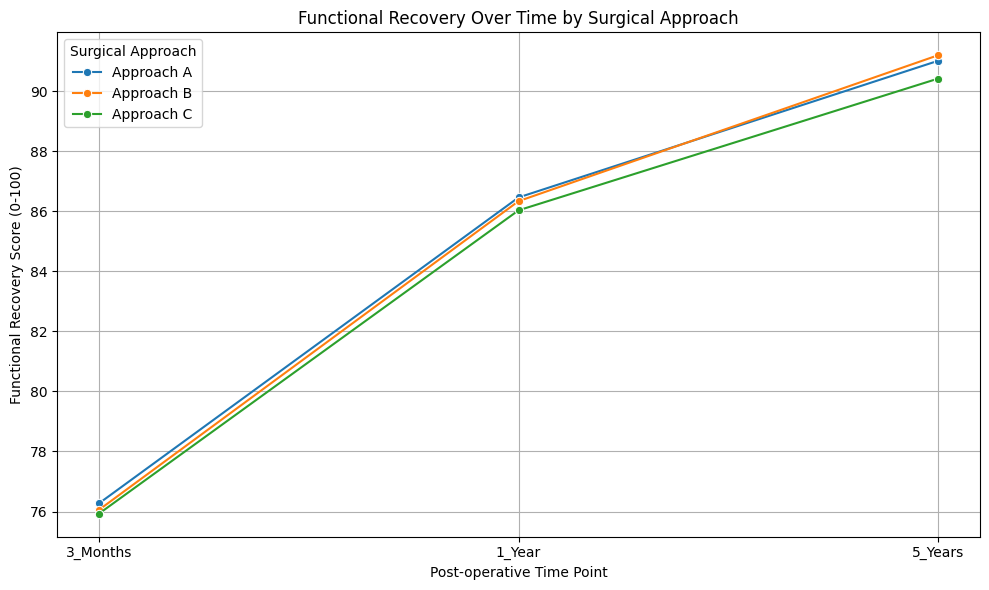

Line plot for Functional Recovery displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot[df_plot['Metric Type'] == 'Functional_Recovery'],
             x='Time Point',
             y='Score',
             hue='Surgical Approach',
             marker='o')
plt.title('Functional Recovery Over Time by Surgical Approach')
plt.xlabel('Post-operative Time Point')
plt.ylabel('Functional Recovery Score (0-100)')
plt.grid(True)
plt.legend(title='Surgical Approach')
plt.tight_layout()
plt.show()

print("Line plot for Functional Recovery displayed.")

**Reasoning**:
I will now create three separate bar plots for 'Aesthetic Outcome' at each of the specified time points (3 Months, 1 Year, and 5 Years) to fulfill the remaining visualization requirement of the subtask.



/tmp/ipython-input-2037130096.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Surgical Approach')


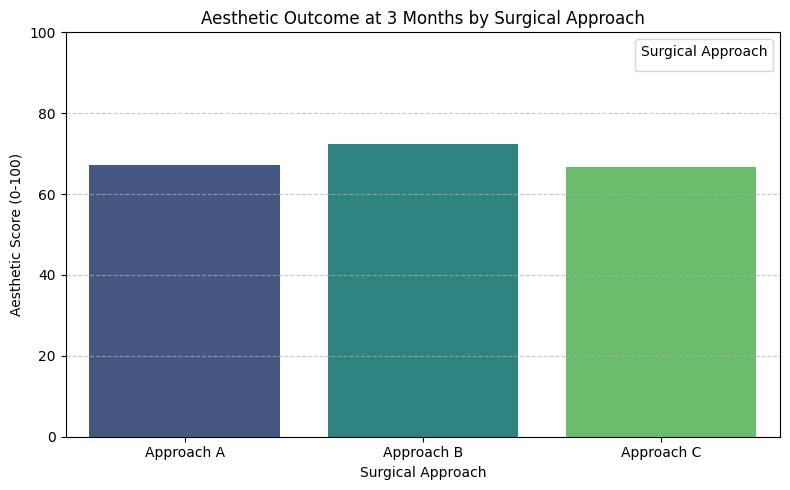

/tmp/ipython-input-2037130096.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Surgical Approach')


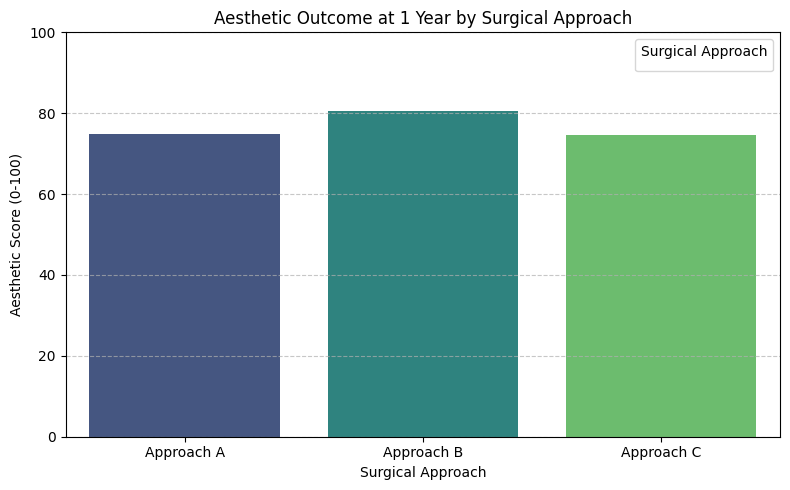

/tmp/ipython-input-2037130096.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Surgical Approach')


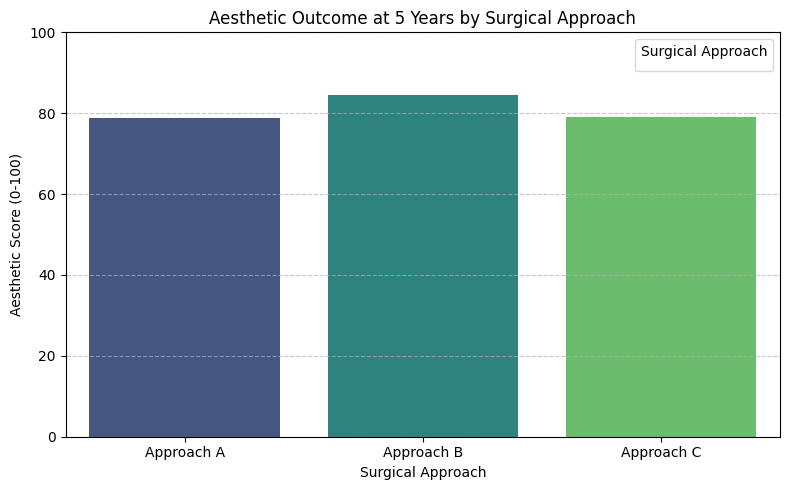

Bar plots for Aesthetic Outcome at different time points displayed.


In [ ]:
time_points = ['3_Months', '1_Year', '5_Years']

for tp in time_points:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_plot[(df_plot['Metric Type'] == 'Aesthetic_Outcome') & (df_plot['Time Point'] == tp)],
                x='Surgical Approach',
                y='Score',
                hue='Surgical Approach',
                palette='viridis')
    plt.title(f'Aesthetic Outcome at {tp.replace("_", " ")} by Surgical Approach')
    plt.xlabel('Surgical Approach')
    plt.ylabel('Aesthetic Score (0-100)')
    plt.ylim(0, 100) # Ensure y-axis starts from 0 for consistent comparison
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Surgical Approach')
    plt.tight_layout()
    plt.show()

print("Bar plots for Aesthetic Outcome at different time points displayed.")

**Reasoning**:
The warning 'No artists with labels found to put in legend' occurred because `seaborn.barplot` already creates a legend when `hue` is specified. The explicit call to `plt.legend()` was redundant and causing the warning. Removing the redundant call will fix this.



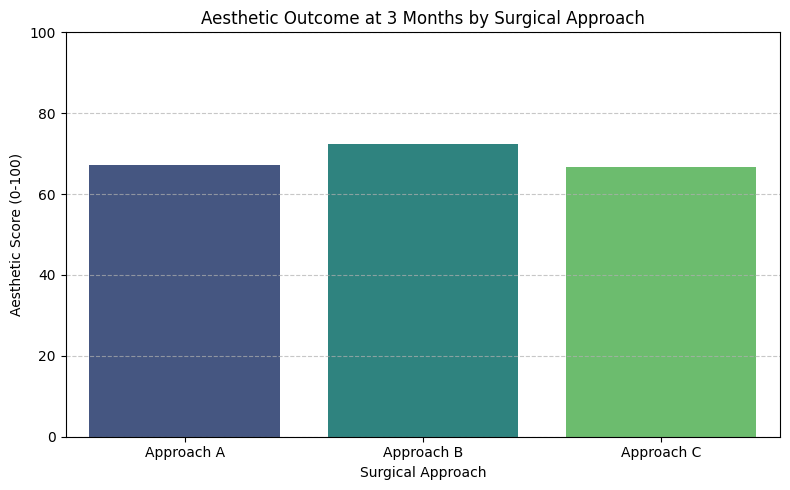

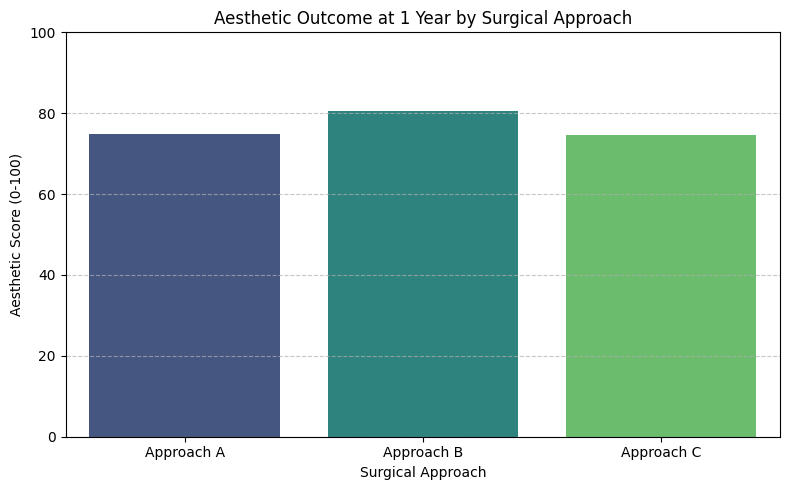

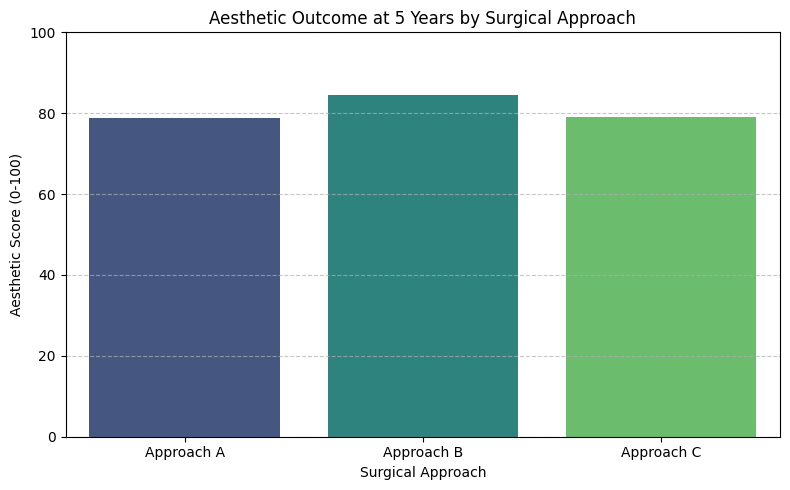

Bar plots for Aesthetic Outcome at different time points displayed.


In [ ]:
time_points = ['3_Months', '1_Year', '5_Years']

for tp in time_points:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_plot[(df_plot['Metric Type'] == 'Aesthetic_Outcome') & (df_plot['Time Point'] == tp)],
                x='Surgical Approach',
                y='Score',
                hue='Surgical Approach',
                palette='viridis')
    plt.title(f'Aesthetic Outcome at {tp.replace("_", " ")} by Surgical Approach')
    plt.xlabel('Surgical Approach')
    plt.ylabel('Aesthetic Score (0-100)')
    plt.ylim(0, 100) # Ensure y-axis starts from 0 for consistent comparison
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Removed redundant plt.legend(title='Surgical Approach') as seaborn.barplot with hue already creates one
    plt.tight_layout()
    plt.show()

print("Bar plots for Aesthetic Outcome at different time points displayed.")

## Final Task

### Subtask:
Summarize the simulated surgical outcomes for the different approaches, discussing the quantitative and qualitative metrics predicted by the simplified model. Provide initial insights into how surgeons might compare strategies based on these simulated results.


## Summary:

### Data Analysis Key Findings

*   **Defined Metrics and Approaches**: Three hypothetical surgical approaches ('Approach A' - standard, 'Approach B' - minimally invasive, 'Approach C' - novel/experimental) were established. Two key outcome metrics, 'Functional Recovery Score' and 'Aesthetic Score' (both 0-100), were defined for evaluation at three post-operative time points: 3 months, 1 year, and 5 years.
*   **Simulated Data Generation**: A dataset of 1,000 synthetic patient records was created, including patient characteristics and simulated outcomes. 'Approach B' was designed to yield slightly better aesthetic outcomes, while 'Approach C' exhibited higher variance in its results.
*   **Simplified Predictive Model**: A `predict_outcome` function was developed. This model uses the average historical outcomes per approach and applies a rule-based adjustment based on the patient's `General_Health_Score` to functional recovery predictions.
*   **Comparative Simulation Results (for a hypothetical patient: Age 55, BMI 28.5, General Health Score 7)**:
    *   **Aesthetic Outcomes**: 'Approach B' consistently demonstrated superior aesthetic outcomes across all time points, achieving a predicted score of 72.43 at 3 months, 80.61 at 1 year, and 84.39 at 5 years. This was notably higher than 'Approach A' (67.18, 74.96, 78.81) and 'Approach C' (66.64, 74.63, 78.99).
    *   **Functional Recovery**: All approaches showed comparable and improving functional recovery scores over time. 'Approach B' had a slight lead at the 5-year mark with 91.20, closely followed by 'Approach A' at 91.01 and 'Approach C' at 90.42.
    *   **Overall Improvement**: Both functional and aesthetic scores for all approaches generally improved over the 5-year post-operative period.
*   **Visualizations**: Line plots effectively displayed the progression of functional recovery over time for each approach, while bar charts provided clear comparisons of aesthetic outcomes at the 3-month, 1-year, and 5-year marks.

### Insights or Next Steps

*   **Strategy Prioritization**: Surgeons considering this patient profile might favor 'Approach B' if aesthetic outcome is a primary concern, given its consistently higher predicted aesthetic scores with comparable functional recovery.
*   **Model Refinement**: The current simplified model could be enhanced by incorporating more complex interactions between patient characteristics and surgical approaches, or by using more advanced machine learning techniques to capture non-linear relationships and provide more nuanced predictions.
